In [16]:
import pandas as pd
import warnings
import re
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np

# warning 없애기
warnings.filterwarnings("ignore")

# 글씨체 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# df = pd.read_csv('C:/Users/wndus/OneDrive/바탕 화면/관광지추천/2차_전처리.csv', encoding = 'utf-8')
df = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/3차_전처리.csv')
df

,아이디,국가별,성별,연령별,문1. 주요 방한 목적,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1순위,문3-1. 고려한 관광활동_1순위,문3-2. 고려한 관광인프라_1순위,"문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)",...,주요 체재 지역,총 국내 지출경비,총 식비_비율,총 국내 교통비_비율,총 체험/활동비_비율,총 뷰티/의료비_비율,총 여행 서비스비_비율,숙박비_비율,쇼핑비_비율,기타 비용_비율
0,6.0,3.0,2.0,2.0,1,4.0,2.0,1.0,6.0,40.49,...,서울,1093.20,0.324863,0.120051,0.021186,0.049433,0.000000,0.112999,0.353110,0.018359
1,12.0,5.0,2.0,4.0,1,1.0,8.0,5.0,5.0,228.02,...,서울,1140.09,0.168539,0.033708,0.011236,0.000000,0.000000,0.337079,0.449438,0.000000
2,14.0,8.0,2.0,3.0,1,1.0,4.0,12.0,1.0,204.30,...,서울,1430.10,0.158730,0.088889,0.022222,0.000000,0.000000,0.666667,0.063492,0.000000
3,19.0,8.0,1.0,5.0,1,1.0,1.0,5.0,4.0,219.91,...,서울,1759.25,0.129032,0.419355,0.000000,0.000000,0.000000,0.258065,0.193548,0.000000
4,20.0,3.0,1.0,2.0,1,1.0,7.0,7.0,10.0,167.08,...,서울,1336.60,0.243902,0.170732,0.000000,0.000000,0.146341,0.195122,0.243902,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,21569.0,1.0,1.0,2.0,1,1.0,5.0,3.0,6.0,95.40,...,제주,477.03,0.441167,0.073538,0.000000,0.029411,0.000000,0.147056,0.294111,0.014716
9648,21570.0,1.0,1.0,4.0,1,1.0,1.0,12.0,7.0,154.33,...,제주,925.98,0.454545,0.090909,0.000000,0.000000,0.000000,0.303030,0.151515,0.000000
9649,21571.0,1.0,1.0,3.0,1,1.0,5.0,3.0,1.0,962.46,...,제주,4812.29,0.072886,0.000000,0.000000,0.000000,0.005831,0.043732,0.874636,0.002915
9650,21573.0,1.0,2.0,4.0,1,2.0,5.0,1.0,1.0,89.44,...,제주,357.77,0.392151,0.000000,0.000000,0.000000,0.000000,0.196076,0.392151,0.019622


# 1. 1인 1일 지출경비

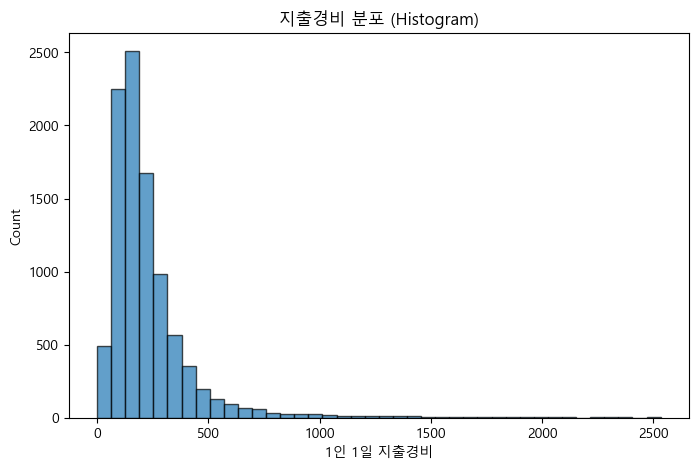

In [17]:
target_col = '문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)'

plt.figure(figsize=(8,5))
plt.hist(df[target_col], bins=40, edgecolor='black', alpha=0.7)
plt.xlabel('1인 1일 지출경비')
plt.ylabel('Count')
plt.title('지출경비 분포 (Histogram)')
plt.show()


In [18]:
quantiles = np.arange(0, 1.01, 0.05)   # 0%, 5%, 10%, ..., 100%
q_table = df[target_col].quantile(quantiles)

q_df = q_table.reset_index()
q_df.columns = ['Quantile', 'Value']
q_df

,Quantile,Value
0,0.00,0.0000
1,0.05,62.9400
2,0.10,79.8850
3,0.15,93.3375
4,0.20,106.0800
5,0.25,118.1350
6,0.30,130.0900
7,0.35,141.0150
8,0.40,152.5000
9,0.45,165.0875


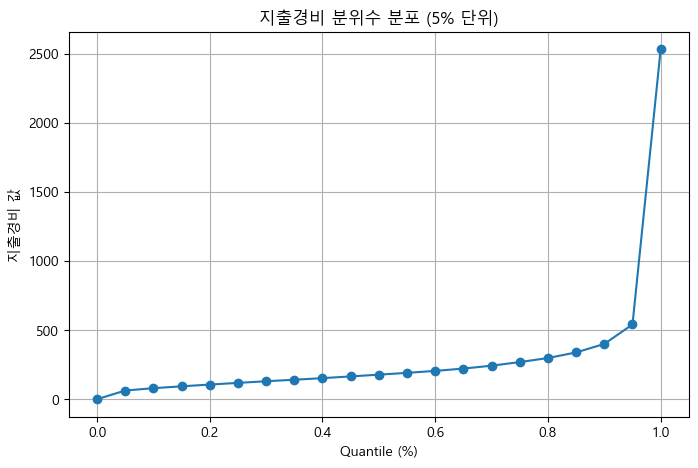

In [19]:
plt.figure(figsize=(8,5))
plt.plot(q_df['Quantile'], q_df['Value'], marker='o')
plt.xlabel('Quantile (%)')
plt.ylabel('지출경비 값')
# plt.xlim(0, 0.95) 
# plt.ylim(0, 600)
plt.title('지출경비 분위수 분포 (5% 단위)')
plt.grid(True)
plt.show()

In [20]:
# q_df 는 다음 형태로 이미 존재한다:
# Quantile | Value

q = q_df['Quantile'].values
v = q_df['Value'].values

# 인접 분위수 간 차이 계산
diff = np.diff(v)  # Value 차이
step = np.diff(q)  # Quantile 차이 (여기서는 전부 5씩)

# 기울기(증가량) = diff / step 이지만 step은 일정하므로 diff 자체로 비교 가능
slope = diff / step

# 구간 테이블 생성
slope_df = pd.DataFrame({
    'q_start': q[:-1],
    'q_end': q[1:],
    'v_start': v[:-1],
    'v_end': v[1:],
    'diff': diff,
    'slope': slope
})

# 기울기 큰 순으로 7개 구간 추출
top7 = slope_df.reindex(slope_df['slope'].abs().sort_values(ascending=False).index).head(7)

top7

,q_start,q_end,v_start,v_end,diff,slope
19,0.95,1.00,540.9375,2532.5000,1991.5625,39831.25
18,0.90,0.95,400.0000,540.9375,140.9375,2818.75
0,0.00,0.05,0.0000,62.9400,62.9400,1258.80
17,0.85,0.90,338.5600,400.0000,61.4400,1228.80
16,0.80,0.85,298.1400,338.5600,40.4200,808.40
15,0.75,0.80,268.7500,298.1400,29.3900,587.80
14,0.70,0.75,242.5800,268.7500,26.1700,523.40


In [21]:
slope_df.reindex(slope_df['slope'].abs().sort_values(ascending=False).index)

# 90 ~ 100 % 
# 65 ~ 90 %
# 55 ~ 65 %
# 15 ~ 55 % 
# 5 ~ 15 %
# 0 ~ 5 %

,q_start,q_end,v_start,v_end,diff,slope
19,0.95,1.00,540.9375,2532.5000,1991.5625,39831.25
18,0.90,0.95,400.0000,540.9375,140.9375,2818.75
0,0.00,0.05,0.0000,62.9400,62.9400,1258.80
17,0.85,0.90,338.5600,400.0000,61.4400,1228.80
16,0.80,0.85,298.1400,338.5600,40.4200,808.40
15,0.75,0.80,268.7500,298.1400,29.3900,587.80
14,0.70,0.75,242.5800,268.7500,26.1700,523.40
13,0.65,0.70,221.7100,242.5800,20.8700,417.40
1,0.05,0.10,62.9400,79.8850,16.9450,338.90
12,0.60,0.65,205.0100,221.7100,16.7000,334.00


In [22]:
### 구간화 ###

col = '문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)'

# 분위수 기준값
p20 = 106.08
p50 = 177.765
p80 = 298.14
p90 = 400
p95 = 540.9375

def segment(x):
    if x < p20:
        return 1
    elif x < p50:
        return 2
    elif x < p80:
        return 3
    elif x < p90:
        return 4
    elif x < p95:
        return 5
    else:
        return 6

df[col] = df[col].apply(segment)


df['문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)'].value_counts()

문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)
2    2876
3    2874
1    1917
4     957
6     546
5     482
Name: count, dtype: int64

In [23]:
df.head()

,아이디,국가별,성별,연령별,문1. 주요 방한 목적,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1순위,문3-1. 고려한 관광활동_1순위,문3-2. 고려한 관광인프라_1순위,"문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)",...,주요 체재 지역,총 국내 지출경비,총 식비_비율,총 국내 교통비_비율,총 체험/활동비_비율,총 뷰티/의료비_비율,총 여행 서비스비_비율,숙박비_비율,쇼핑비_비율,기타 비용_비율
0,6.0,3.0,2.0,2.0,1,4.0,2.0,1.0,6.0,1,...,서울,1093.20,0.324863,0.120051,0.021186,0.049433,0.000000,0.112999,0.353110,0.018359
1,12.0,5.0,2.0,4.0,1,1.0,8.0,5.0,5.0,3,...,서울,1140.09,0.168539,0.033708,0.011236,0.000000,0.000000,0.337079,0.449438,0.000000
2,14.0,8.0,2.0,3.0,1,1.0,4.0,12.0,1.0,3,...,서울,1430.10,0.158730,0.088889,0.022222,0.000000,0.000000,0.666667,0.063492,0.000000
3,19.0,8.0,1.0,5.0,1,1.0,1.0,5.0,4.0,3,...,서울,1759.25,0.129032,0.419355,0.000000,0.000000,0.000000,0.258065,0.193548,0.000000
4,20.0,3.0,1.0,2.0,1,1.0,7.0,7.0,10.0,2,...,서울,1336.60,0.243902,0.170732,0.000000,0.000000,0.146341,0.195122,0.243902,0.000000


# 2. 총 체제기간

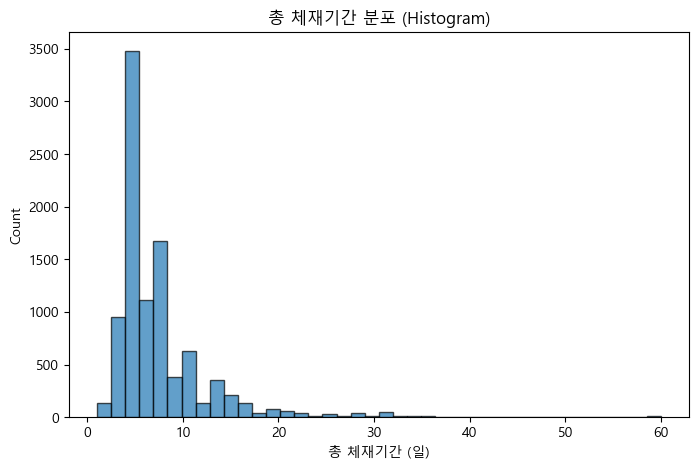

In [24]:
target_col2 = '문9-3. 총 체재기간_61일 이상 결측'

plt.figure(figsize=(8,5))
plt.hist(df[target_col2], bins=40, edgecolor='black', alpha=0.7)
plt.xlabel('총 체재기간 (일)')
plt.ylabel('Count')
plt.title('총 체재기간 분포 (Histogram)')
plt.show()


In [25]:
quantiles = np.arange(0, 1.01, 0.05)   # 0%, 5%, 10%, ..., 100%
q_table2 = df[target_col2].quantile(quantiles)

q_df2 = q_table2.reset_index()
q_df2.columns = ['Quantile', 'Value']
q_df2


,Quantile,Value
0,0.00,1.0
1,0.05,3.0
2,0.10,3.0
3,0.15,4.0
4,0.20,4.0
5,0.25,4.0
6,0.30,5.0
7,0.35,5.0
8,0.40,5.0
9,0.45,5.0


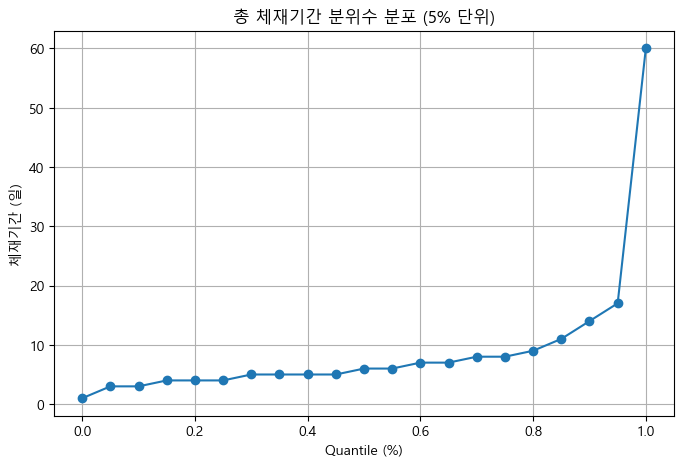

In [26]:
plt.figure(figsize=(8,5))
plt.plot(q_df2['Quantile'], q_df2['Value'], marker='o')
plt.xlabel('Quantile (%)')
plt.ylabel('체재기간 (일)')
plt.title('총 체재기간 분위수 분포 (5% 단위)')
plt.grid(True)
plt.show()

In [27]:
q = q_df2['Quantile'].values
v = q_df2['Value'].values

# 인접 분위수 간 차이 계산
diff = np.diff(v)      # Value 차이
step = np.diff(q)      # Quantile 차이 (여기서는 전부 5씩 일정)

# 기울기(증가량) = diff / step (step 일정이라 diff로 비교해도 동일)
slope = diff / step

# 구간 테이블 생성
slope_df2 = pd.DataFrame({
    'q_start': q[:-1],
    'q_end': q[1:],
    'v_start': v[:-1],
    'v_end': v[1:],
    'diff': diff,
    'slope': slope
})

# 기울기(절댓값) 큰 순으로 상위 7개 구간 추출
top7_stay = slope_df2.reindex(slope_df2['slope'].abs().sort_values(ascending=False).index).head(7)

top7_stay


,q_start,q_end,v_start,v_end,diff,slope
19,0.95,1.00,17.0,60.0,43.0,860.0
17,0.85,0.90,11.0,14.0,3.0,60.0
18,0.90,0.95,14.0,17.0,3.0,60.0
0,0.00,0.05,1.0,3.0,2.0,40.0
16,0.80,0.85,9.0,11.0,2.0,40.0
9,0.45,0.50,5.0,6.0,1.0,20.0
2,0.10,0.15,3.0,4.0,1.0,20.0


In [28]:
### 구간화 ###

col = '문9-3. 총 체재기간_61일 이상 결측'

segments = []

for x in df[col]:
    if 1 <= x <= 3:
        segments.append(1)
    elif 4 <= x <= 5:
        segments.append(2)
    elif 6 <= x <= 7:
        segments.append(3)
    elif 8 <= x <= 11:
        segments.append(4)
    elif 12 <= x <= 17:
        segments.append(5)
    elif x >= 18:
        segments.append(6)
    else:
        segments.append(np.nan)  # 혹시 0이나 이상값 있을 때 대비
        

df['문9-3. 총 체재기간_61일 이상 결측'] = segments
df['문9-3. 총 체재기간_61일 이상 결측'].value_counts()

문9-3. 총 체재기간_61일 이상 결측
2    3483
3    2074
4    1730
1    1088
5     826
6     451
Name: count, dtype: int64

In [29]:
df.columns

Index(['아이디', '국가별', '성별', '연령별', '문1. 주요 방한 목적', '한국 방문횟수(카테고리)',
       '문1-1. 한국여행 관심 계기_1순위', '문3-1. 고려한 관광활동_1순위', '문3-2. 고려한 관광인프라_1순위',
       '문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)',
       '문9-3. 총 체재기간_61일 이상 결측', '숙박시설_그룹', '여행동반자_그룹', '방문 지역 수', '주요 체재 지역',
       '총 국내 지출경비', '총 식비_비율', '총 국내 교통비_비율', '총 체험/활동비_비율', '총 뷰티/의료비_비율',
       '총 여행 서비스비_비율', '숙박비_비율', '쇼핑비_비율', '기타 비용_비율'],
      dtype='object')

# 3. 항목별 지출경비

In [ ]:
import pandas as pd

df1 = pd.read_csv('C:/Users/wndus/OneDrive/바탕 화면/관광지추천/만족도조사.csv', encoding = 'utf-8')
df1 = df1[df1['문1. 주요 방한 목적'] == 1]
df1

In [ ]:
# 1. df1에서 지출 컬럼 자동 선택
expense_cols = [col for col in df1.columns if col.startswith('문10-1. 항목별 지출경비(상하위 1% 대체)_')]

# 2. ID + 선택된 컬럼만 유지
df1_use = df1[['아이디'] + expense_cols]

# 3. merge
df = df.merge(df1_use, on='아이디', how='left')
df

In [ ]:
expense_groups = {
    '식비': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_음식점 지출비',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_식음료/식재료 구매 비용'
    ],
    
    '여행_가이드': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_여행사에 지불한 경비',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_가이드 비용/가이드 팁'
    ],
    
    '숙박': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_숙박비'
    ],
    
    '교통': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_한국에서의 교통비_항공비(국적기)',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_한국에서의 교통비_항공비(국적기 외)',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_한국에서의 교통비_수상 여객운송',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_한국에서의 교통비_철도 여객운송',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_한국에서의 교통비_도로 여객운송',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_운송장비 대여서비스',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_유류비'
    ],
    
    '체험_문화': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_문화서비스',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_오락 및 운동관련 서비스'
    ],
    
    '쇼핑': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_쇼핑비'
    ],
    
    '기타': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_데이터 통신비',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_기타 비용'
    ],
    
    '뷰티/의료': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_치료 및 건강검진비',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_미용 서비스비'
    ]
}


In [ ]:
# 그룹별 지출 합 변수 생성
for group, cols in expense_groups.items():
    df[f'총_{group}_지출경비'] = df[cols].sum(axis=1)
    

In [ ]:
# 총 국내 지출경비 생성
df['총_국내_지출경비'] = df[[f'총_{g}_지출경비' for g in expense_groups]].sum(axis=1)
df['총_국내_지출경비']

In [ ]:
# 비율 변수 생성
for group in expense_groups.keys():
    df[f'{group}_비율'] = (df[f'총_{group}_지출경비'] / df['총_국내_지출경비']).round(3)


In [ ]:
drop_cols = [col for col in df.columns 
             if col.startswith('문10-1. 항목별 지출경비(상하위 1% 대체)_')]

df = df.drop(columns=drop_cols)
df.columns

In [ ]:
df = df.drop(columns= ['Unnamed: 0.1', 'Unnamed: 0', '문1. 주요 방한 목적'])
df

In [30]:
# 교통
# 체험 활동
# 여행 가이드
# "총" 숙박
# "총" 쇼핑
# 기타 "비용"
df.columns

Index(['아이디', '국가별', '성별', '연령별', '문1. 주요 방한 목적', '한국 방문횟수(카테고리)',
       '문1-1. 한국여행 관심 계기_1순위', '문3-1. 고려한 관광활동_1순위', '문3-2. 고려한 관광인프라_1순위',
       '문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)',
       '문9-3. 총 체재기간_61일 이상 결측', '숙박시설_그룹', '여행동반자_그룹', '방문 지역 수', '주요 체재 지역',
       '총 국내 지출경비', '총 식비_비율', '총 국내 교통비_비율', '총 체험/활동비_비율', '총 뷰티/의료비_비율',
       '총 여행 서비스비_비율', '숙박비_비율', '쇼핑비_비율', '기타 비용_비율'],
      dtype='object')

In [31]:
# 칼럼명 맞추기

## 매핑

In [32]:
mapping = {
    1: 1,
    2: 2,
    3: 3,
    4: 4, 10: 4,
    5: 5, 6: 5,
    7: 6,
    8: 7, 9: 7,
    11: 8
}

df['문1-1. 한국여행 관심 계기_1순위'] = df['문1-1. 한국여행 관심 계기_1순위'].map(mapping)
df['문1-1. 한국여행 관심 계기_1순위'].value_counts()

문1-1. 한국여행 관심 계기_1순위
1    2559
2    1681
6    1610
7    1513
4     980
5     828
3     314
8     167
Name: count, dtype: int64

In [33]:
mapping = {
    1: 1,
    2: 2,
    3: 3,
    4: 4, 5: 4,
    6: 5, 8: 5,
    7: 6,
    14: 7, 15: 7,
    9: 8,
    10:9, 11:9,
    12:10, 13:10,
    16:11
}

df['문3-1. 고려한 관광활동_1순위'] = df['문3-1. 고려한 관광활동_1순위'].map(mapping)
df['문3-1. 고려한 관광활동_1순위'].value_counts()

문3-1. 고려한 관광활동_1순위
2     2047
4     1688
1     1531
3     1144
9     1048
6      852
10     607
5      504
8      103
7       95
11      33
Name: count, dtype: int64

In [34]:
mapping = {
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 5,
    6: 6, 8:6,
    7: 7, 
    9:8, 10:8, 11:8,
    12:9
}

df['문3-2. 고려한 관광인프라_1순위'] = df['문3-2. 고려한 관광인프라_1순위'].map(mapping)
df['문3-2. 고려한 관광인프라_1순위'].value_counts()

문3-2. 고려한 관광인프라_1순위
6    2351
3    1958
8    1335
5    1302
4    1253
2     768
1     498
7     124
9      63
Name: count, dtype: int64

In [35]:
mapping = {
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 5,
    6: 6, 8:6,
    7: 7, 
    9:8, 10:8, 11:8,
    12:9
}

df['문3-2. 고려한 관광인프라_1순위'] = df['문3-2. 고려한 관광인프라_1순위'].map(mapping)
df['문3-2. 고려한 관광인프라_1순위'].value_counts()

문3-2. 고려한 관광인프라_1순위
6    3686
3    1958
5    1302
4    1253
2     768
1     498
7     124
8      63
Name: count, dtype: int64

In [37]:
df.head()

,아이디,국가별,성별,연령별,문1. 주요 방한 목적,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1순위,문3-1. 고려한 관광활동_1순위,문3-2. 고려한 관광인프라_1순위,"문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)",...,주요 체재 지역,총 국내 지출경비,총 식비_비율,총 국내 교통비_비율,총 체험/활동비_비율,총 뷰티/의료비_비율,총 여행 서비스비_비율,숙박비_비율,쇼핑비_비율,기타 비용_비율
0,6.0,3.0,2.0,2.0,1,4.0,2,1,6,1,...,서울,1093.20,0.324863,0.120051,0.021186,0.049433,0.000000,0.112999,0.353110,0.018359
1,12.0,5.0,2.0,4.0,1,1.0,7,4,5,3,...,서울,1140.09,0.168539,0.033708,0.011236,0.000000,0.000000,0.337079,0.449438,0.000000
2,14.0,8.0,2.0,3.0,1,1.0,4,10,1,3,...,서울,1430.10,0.158730,0.088889,0.022222,0.000000,0.000000,0.666667,0.063492,0.000000
3,19.0,8.0,1.0,5.0,1,1.0,1,4,4,3,...,서울,1759.25,0.129032,0.419355,0.000000,0.000000,0.000000,0.258065,0.193548,0.000000
4,20.0,3.0,1.0,2.0,1,1.0,6,6,6,2,...,서울,1336.60,0.243902,0.170732,0.000000,0.000000,0.146341,0.195122,0.243902,0.000000


In [38]:
df.shape

(9652, 24)

In [39]:
# df.to_csv('C:/Users/wndus/OneDrive/바탕 화면/관광지추천/4차_전처리.csv')
df.to_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/4차_전처리.csv', index=False)

In [ ]:
# df.drop('문1. 주요 방한 목적', axis=1, inplace=True)

In [ ]:
# df.shape

(9652, 23)

In [ ]:
# df.to_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/4차_전처리.csv', index=False)